In [1]:
##################################################################################
library(ggplot2)
library(gdata)

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



In [171]:
D <- read.table("../Data/All_data.txt")
D <- D[order(D$Region,D$Disease),]

In [172]:
names(D)

[1] "Region"                 "Disease"                "burden_daly"           
 [4] "burden_yll"             "burden_yld"             "burden_death"          
 [7] "Prop_loc_burden_daly"   "Prop_loc_burden_yll"    "Prop_loc_burden_yld"   
[10] "Prop_loc_burden_death"  "Prop_glob_burden_daly"  "Prop_glob_burden_yll"  
[13] "Prop_glob_burden_yld"   "Prop_glob_burden_death" "Prop_NHI_burden_daly"  
[16] "Prop_NHI_burden_yll"    "Prop_NHI_burden_yld"    "Prop_NHI_burden_death" 
[19] "Nb_RCTs_low"            "Nb_RCTs_med"            "Nb_RCTs_up"            
[22] "Nb_Patients_low"        "Nb_Patients_med"        "Nb_Patients_up"        
[25] "Prop_loc_RCTs_low"      "Prop_loc_RCTs_med"      "Prop_loc_RCTs_up"      
[28] "Prop_loc_Patients_low"  "Prop_loc_Patients_med"  "Prop_loc_Patients_up"  
[31] "Prop_glob_RCTs_low"     "Prop_glob_RCTs_med"     "Prop_glob_RCTs_up"     
[34] "Prop_glob_Patients_low" "Prop_glob_Patients_med" "Prop_glob_Patients_up" 
[37] "Prop_NHI_RCTs_low"      "Prop_NHI_RCTs_med"      "Prop_NHI_RCTs_up"      
[40] "Prop_NHI_Patients_low"  "Prop_NHI_Patients_med"  "Prop_NHI_Patients_up"

In [173]:
head(D$burden_daly)

[1] 2220063511  287404109  112485355   30462721   43254504   75821480

In [174]:
metr_burden <- "daly"
metr_res <- "RCTs"

In [179]:
#We compare RCTs to DALYs
dpl <- D[D$Region!="Non-HI",
          c(which(names(D)%in%c("Region","Disease")),
            intersect(grep(metr_burden,names(D)),grep("^burden",names(D))),
            intersect(grep(metr_res,names(D)),grep("^Nb",names(D)))),]

In [180]:
head(dpl)

,Region,Disease,burden_daly,Nb_RCTs_low,Nb_RCTs_med,Nb_RCTs_up
1,All,All,2220063510.80076,78661.775,82179,85358.2
2,All,Cardiovascular and circulatory diseases,287404109.09231,9526.975,10676,11943
3,All,Chronic respiratory diseases,112485355.22285,4302.975,4773,5283
4,All,Cirrhosis of the liver,30462721.1164,534.975,1061,1574
5,All,Congenital anomalies,43254504.439,NA,NA,NA
6,All,"Diabetes, urinary diseases and male infertility",75821480.094146,10613.975,11700.5,12854.05


In [181]:
#Order diseases: increasing burden
dis <- dpl$Disease[dpl$Region=="All"][order(dpl$burden[dpl$Region=="All"])]

In [182]:
dis

[1] Leprosy                                                                                 
 [2] Sudden infant death syndrome                                                            
 [3] Gynecological diseases                                                                  
 [4] Hepatitis                                                                               
 [5] Sexually transmitted diseases excluding HIV                                             
 [6] Oral disorders                                                                          
 [7] Hemoglobinopathies and hemolytic anemias                                                
 [8] Maternal disorders                                                                      
 [9] Neglected tropical diseases excluding malaria                                           
[10] Cirrhosis of the liver                                                                  
[11] Sense organ diseases                                                                    
[12] Digestive diseases (except cirrhosis)                                                   
[13] Skin and subcutaneous diseases                                                          
[14] Congenital anomalies                                                                    
[15] Tuberculosis                                                                            
[16] Neurological disorders                                                                  
[17] Diabetes, urinary diseases and male infertility                                         
[18] Nutritional deficiencies                                                                
[19] HIV/AIDS                                                                                
[20] Malaria                                                                                 
[21] Chronic respiratory diseases                                                            
[22] Musculoskeletal disorders                                                               
[23] Mental and behavioral disorders                                                         
[24] Neoplasms                                                                               
[25] Neonatal disorders                                                                      
[26] Cardiovascular and circulatory diseases                                                 
[27] Diarrhea, lower respiratory infections, meningitis, and other common infectious diseases
[28] All                                                                                     
28 Levels: All ... Tuberculosis

In [183]:
dis <- dis[dis!="All"]

In [184]:
#Number of RCTs per region
regs <- dpl$Region[dpl$Disease=="All"][order(dpl[dpl$Disease=="All",grep("med",names(dpl))],
                                                decreasing=TRUE)]

In [185]:
regs

[1] All                                             
[2] High-income                                     
[3] Southeast Asia, East Asia and Oceania           
[4] North Africa and Middle East                    
[5] Central Europe, Eastern Europe, and Central Asia
[6] South Asia                                      
[7] Latin America and Caribbean                     
[8] Sub-Saharian Africa                             
9 Levels: All Central Europe, Eastern Europe, and Central Asia ... Sub-Saharian Africa

In [186]:
regs <- regs[regs!="All"]

In [187]:
#Region labels
reg_labs <- c("High-income countries",
              "Southeast Asia,\nEast Asia and Oceania",
              "North Africa and\nMiddle East", 
              "Central Europe, Eastern\nEurope and Central Asia",
              "South Asia", 
              "Latin America\nand Caribbean", 
              "Sub-Saharian\nAfrica")

In [188]:
dpl <- dpl[dpl$Region!="All" & dpl$Disease!="All",]

In [189]:
dpl[,grep("med",names(dpl))]

[1]  767.0  570.0   67.0     NA  927.0  263.0  418.0  100.0     NA  114.0
 [11]   72.0     NA    1.0   95.0  400.0  607.0   11.0   78.0 1232.0  471.0
 [21]   75.0  112.0  299.0     NA  337.0     NA   17.0 7959.0 3776.0  705.0
 [31]     NA 8756.0 2428.0 4524.5 1540.0     NA  628.5  991.0     NA   74.0
 [41] 1376.0 7348.0 5232.0  196.0  969.0 9501.0 5027.0  830.0 1450.0 4212.0
 [51]     NA 3202.0     NA   95.0  509.0  294.0   41.0     NA  704.0  220.0
 [61]  303.0  113.0     NA   56.0   92.0     NA   12.0  101.0  302.0  494.0
 [71]   78.0   66.0  593.0  271.0   65.0  142.0  246.0     NA  203.0     NA
 [81]   29.0  907.0  318.0   98.0     NA 1185.0  260.0  846.0  673.0     NA
 [91]   68.0   45.0     NA    2.0  433.0  989.0  612.0   42.0  198.0  620.0
[101]  592.5  116.0  309.0  313.0     NA  416.0     NA   17.0  448.5  232.0
[111]   81.0     NA  676.0  309.0  385.0  132.0     NA   62.0   61.0     NA
[121]   42.0  132.0  306.0  355.0   52.0  100.0  591.0  244.0  124.0  176.5
[131]  247.0     NA  312.0     NA   40.0 1198.0  428.0  166.0     NA 1200.0
[141]  399.0  718.0  283.0     NA  191.0  134.0     NA   60.0  197.0  575.0
[151]  646.0   71.0  112.0 2004.0  474.0  105.0  211.0  408.0     NA  357.0
[161]     NA   53.0  166.0  132.0   10.0     NA  261.0  131.0  133.0   33.0
[171]     NA   11.0  319.0     NA  274.0   66.0  134.0  127.0   71.0   46.0
[181]  201.0   99.0   93.0   41.0   91.0     NA   98.0     NA  105.0

In [190]:
max(dpl[,grep("up",names(dpl))],na.rm=TRUE)

[1] 10059.02

In [191]:
#Normalizing regions: max RCts = max GBD
Norm_fact <- max(dpl[,grep("up",names(dpl))],na.rm=TRUE)/max(dpl$burden)
dpl$gpl <- (dpl$burden/max(dpl$burden))*max(dpl[,grep("up",names(dpl))],na.rm=TRUE)

In [192]:
#Bar size = wdt*2
wdt <- 0.45
#Distance between regions (end to end)
d_reg <- 400
#Distance between center of region and start of bars (for disease labels)
esp_dis_nb <- 200

In [193]:
Rg <- 0
d <- "Neoplasms"
rg <- "High-income"

In [194]:
Rg-esp_dis_nb-dpl$gpl[dpl$Dis==d & dpl$Region==rg]
Rg+esp_dis_nb+dpl[dpl$Dis==d & dpl$Region==rg,grep(metr_res,names(dpl))]

[1] -3528.407

,Nb_RCTs_low,Nb_RCTs_med,Nb_RCTs_up
76,9002.975,9701.000,10259.025


In [196]:
displ_err(d,Rg,rg)

,x,ymin,ymax,metr,reg,dis_nb
1,24,9002.975,10259.025,Research,High-income,24


In [197]:
#Rectangles for a given region and disease
#Rg = central position of region
#d = name of the disease
#rg = name of the region
displt <- 
function(d,Rg,rg){
res_pl <- data.frame(  xmin = which(d==dis)-wdt,
                       xmax = which(d==dis)+wdt,
                       ymin = Rg+esp_dis_nb,
                       ymax = Rg+esp_dis_nb+dpl[dpl$Dis==d & dpl$Region==rg,grep("med",names(dpl))],
                       metr="Research",
                       reg=rg,
                       ycent=Rg,
                       dis_nb=which(d==dis),
                       disease=d)
burd_pl <- data.frame( xmin = which(d==dis)-wdt,
                       xmax = which(d==dis)+wdt,
                       ymin = Rg-esp_dis_nb,
                       ymax = Rg-esp_dis_nb-dpl$gpl[dpl$Dis==d & dpl$Region==rg],
                       metr="Burden",
                       reg=rg,
                       ycent=Rg,
                       dis_nb=which(d==dis),
                       disease=d)
rbind(res_pl,burd_pl)
}

In [198]:
displt_err <- function(d,Rg,rg){
    data.frame(x = which(d==dis),
               ymin = Rg+esp_dis_nb+dpl[dpl$Dis==d & dpl$Region==rg,grep("low",names(dpl))],
               ymax = Rg+esp_dis_nb+dpl[dpl$Dis==d & dpl$Region==rg,grep("up",names(dpl))],
               metr="Research",
               reg=rg,
               dis_nb=which(d==dis),
               disease=d)
}

In [199]:
#Rectangles pour toutes les maladies, une région donnée
regplt <- function(Rg,rg) do.call('rbind',lapply(dis,function(x){displt(x,Rg,rg)}))
regplt_err <- function(Rg,rg) do.call('rbind',lapply(dis,function(x){displt_err(x,Rg,rg)}))

In [200]:
#Emplacement des régions
RG <- 0
for(i in 2:length(regs)){
RG <- c(RG,
        RG[i-1]-(2*esp_dis_nb+
                 max(dpl$gpl[dpl$Region==regs[i-1]])+
                 d_reg+max(dpl[dpl$Region==regs[i],grep("up",names(dpl))],na.rm=TRUE)))
}


In [201]:
RG

[1]      0.000  -6272.433 -14657.718 -18242.731 -23875.332 -35505.357 -37825.422

In [202]:
#DataFrame Plot
DPLOT <- do.call('rbind',lapply(1:length(regs),function(i){regplt(RG[i],regs[i])}))


In [203]:
head(DPLOT)

,xmin,xmax,ymin,ymax,metr,reg,ycent,dis_nb,disease
1,0.55,1.45,200,NA,Research,High-income,0,1,Leprosy
2,0.55,1.45,-200,-200.001835770178,Burden,High-income,0,1,Leprosy
3,1.55,2.45,200,NA,Research,High-income,0,2,Sudden infant death syndrome
4,1.55,2.45,-200,-224.354018639849,Burden,High-income,0,2,Sudden infant death syndrome
5,2.55,3.45,200,1740,Research,High-income,0,3,Gynecological diseases
6,2.55,3.45,-200,-293.593147345966,Burden,High-income,0,3,Gynecological diseases


In [204]:
#Error_bars dataframe
DPLOT_err <- do.call('rbind',lapply(1:length(regs),function(i){regplt_err(RG[i],regs[i])}))

In [205]:
head(DPLOT_err[DPLOT_err$disease=="Hepatitis",])

,x,ymin,ymax,metr,reg,dis_nb,disease
4,4,612.975,1110,Research,High-income,4,Hepatitis
31,4,-5945.43257260214,-5831.43257260214,Research,"Southeast Asia, East Asia and Oceania",4,Hepatitis
58,4,-14414.7180560349,-14351.7180560349,Research,North Africa and Middle East,4,Hepatitis
85,4,-17968.7310088212,-17897.7310088212,Research,"Central Europe, Eastern Europe, and Central Asia",4,Hepatitis
112,4,-23635.3320368601,-23589.3320368601,Research,South Asia,4,Hepatitis
139,4,-35270.3570368601,-35228.3570368601,Research,Latin America and Caribbean,4,Hepatitis


In [206]:
#Inner circle
IC <- 8
DPLOT$xmin <- DPLOT$xmin + IC
DPLOT$xmax <- DPLOT$xmax + IC
DPLOT$xcent <- DPLOT$dis_nb + IC
DPLOT_err$x <- DPLOT_err$x + IC
DPLOT_err$xcent <- DPLOT_err$dis_nb + IC

In [207]:
min(DPLOT_err$ymax,na.rm=TRUE)
max(DPLOT_err$ymax,na.rm=TRUE)

[1] -37604.42

[1] 10259.02

In [208]:
totalLength <- max(DPLOT_err$ymax,na.rm=TRUE)-min(DPLOT$ymax,na.rm=TRUE)+d_reg
alphaStart <- 2*pi*(max(DPLOT_err$ymax[D$Region==regs[1]]+d_reg/2,na.rm=TRUE)/totalLength)


In [209]:
totalLength
alphaStart

[1] 58334.28

[1] -1.395245

In [210]:
#REGION LABELS
#################
totalLength <- max(DPLOT_err$ymax,na.rm=TRUE)-min(DPLOT$ymax,na.rm=TRUE)+d_reg

  readableAngle<-function(x){
    angle<-x*(360/totalLength)
#    angle+ifelse(sign(cos(angle*pi/180))+sign(sin(angle*pi/180))==-2,180,0)
  }
    familyLabelsDF<-data.frame(xmin=RG,label=reg_labs)
    familyLabelsDF$angle <- readableAngle(familyLabelsDF$xmin)


#  GGPLOT Object

In [250]:
p <- ggplot(DPLOT) + geom_rect(aes(xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,fill=metr))

Warning message:
“Removed 35 rows containing missing values (geom_rect).”

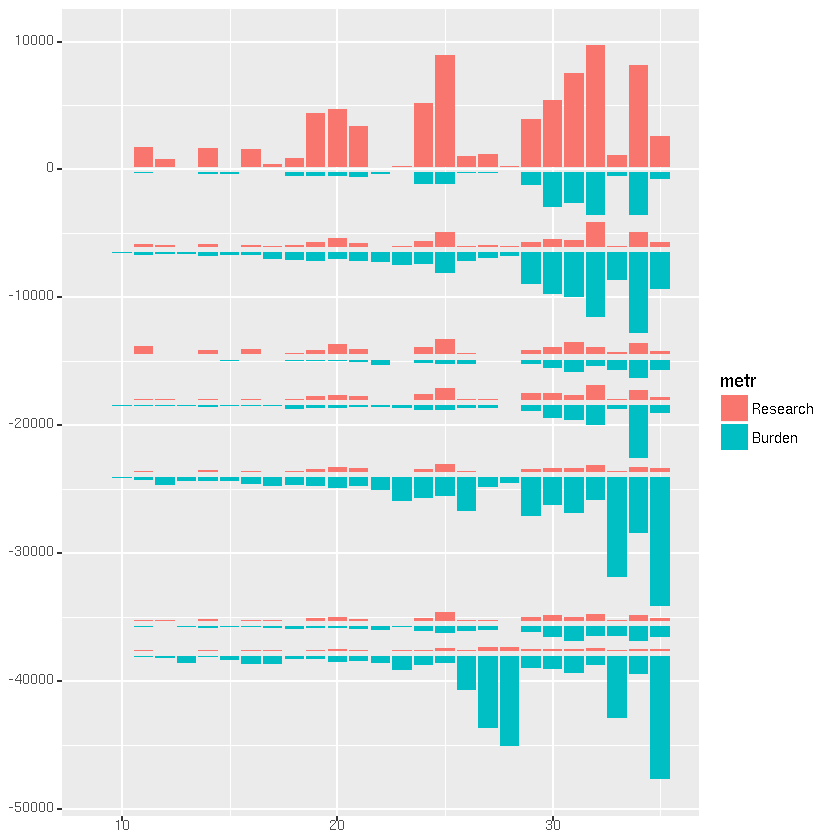

In [251]:
p

In [252]:
#Disease labels
###################
DPLOT$size_dis_lab = 2.3*(40+DPLOT$dis_nb)/(40+max(DPLOT$dis_nb))


Warning message:
“Removed 35 rows containing missing values (geom_rect).”

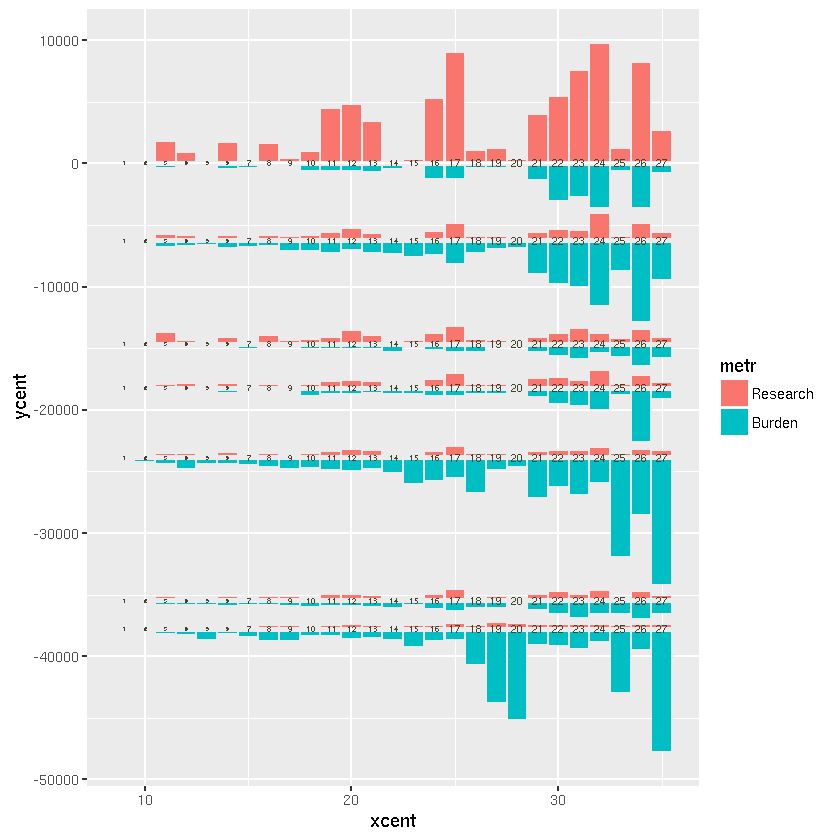

In [253]:
p <- p + geom_text(aes(x=xcent,
        y=ycent,
        label=dis_nb,
        hjust=0.5),
size=DPLOT$size_dis_lab,col="#42442E")
p

Warning message:
“Removed 35 rows containing missing values (geom_rect).”Warning message:
“Removed 35 rows containing missing values (geom_errorbar).”

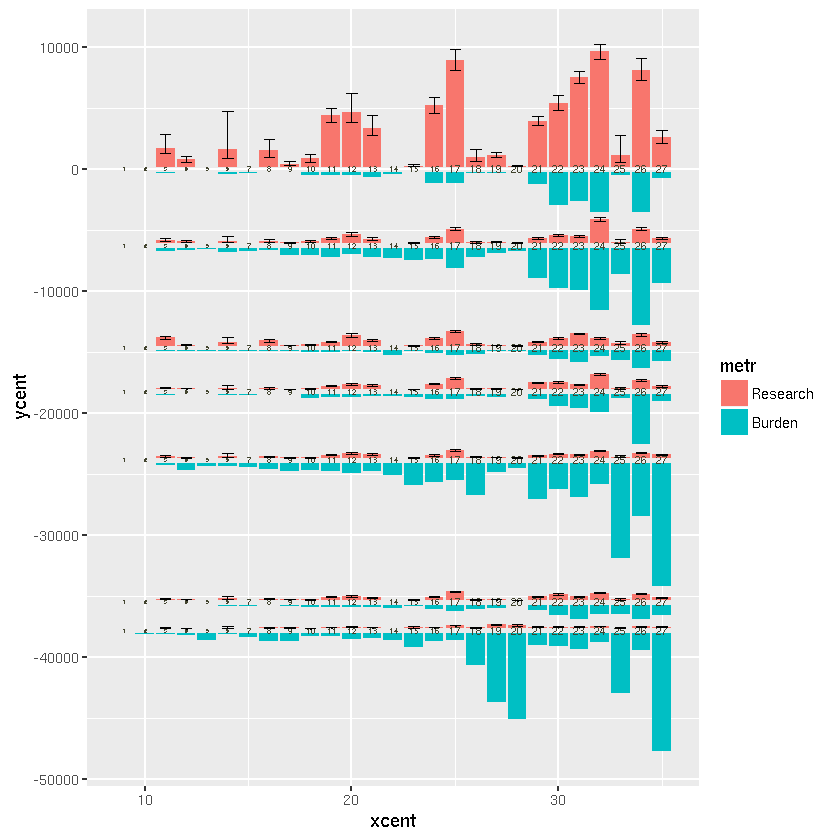

In [254]:
p <- p + geom_errorbar(aes(x=x,ymax=ymax,ymin=ymin),size=0.1,width=0.5,data=DPLOT_err)
p

Warning message:
“Removed 35 rows containing missing values (geom_rect).”Warning message:
“Removed 35 rows containing missing values (geom_errorbar).”

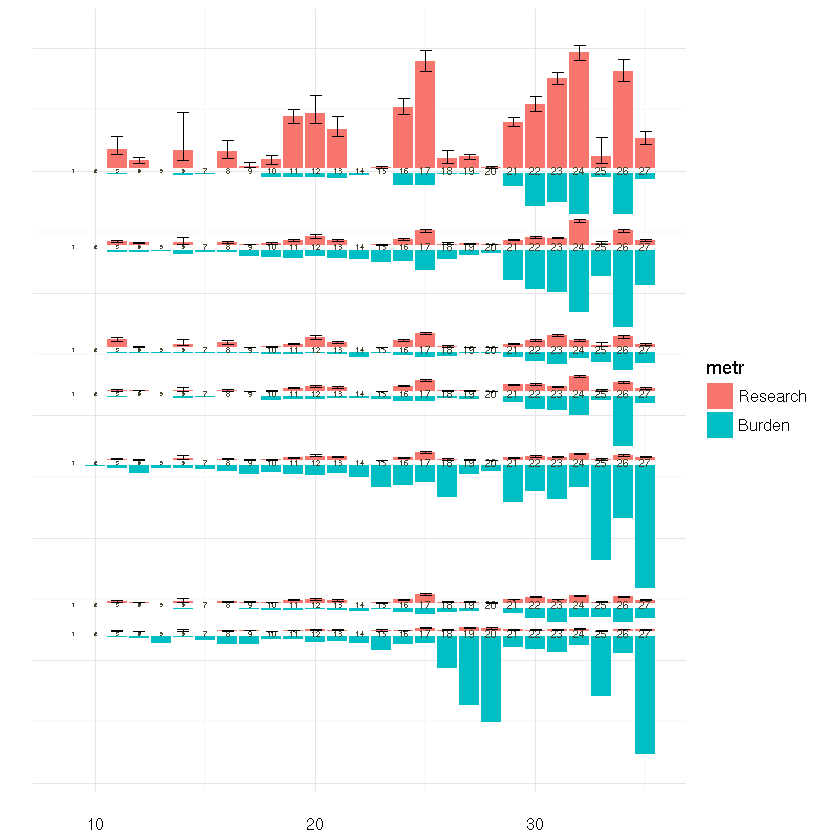

In [255]:
p <- p + theme_minimal()
p <-p+theme(
    axis.title.y=element_blank(),
    axis.text.y=element_blank(),
    axis.ticks.y=element_blank(),
    axis.title.x=element_blank(),
    axis.ticks.x=element_blank()
    )
p

In [256]:
rcttks <- c(0,100,500,1000,2000,3000,5000,7500,10000)

maj_rcts <- function(nb){
x <- nb
k <- 0
while(x>=100){
x <- x%/%10
k <- k+1
}
res <- (x+1)*10^k
res
}


In [257]:
x <- "High-income"
data.frame(
breaks = unique(DPLOT$ymin[DPLOT$metr=="Research" & DPLOT$reg==x]) + 
c(rcttks[2:findInterval(max(dpl[dpl$Region==x,grep("up",names(dpl))],na.rm=TRUE),rcttks)],
maj_rcts(max(dpl[dpl$Region==x,grep("up",names(dpl))],na.rm=TRUE))),

labels=c(rcttks[2:findInterval(max(dpl[dpl$Region==x,grep("up",names(dpl))],na.rm=TRUE),rcttks)],
maj_rcts(max(dpl[dpl$Region==x,grep("up",names(dpl))],na.rm=TRUE))),
region=x)


,breaks,labels,region
1,300,100,High-income
2,700,500,High-income
3,1200,1000,High-income
4,2200,2000,High-income
5,3200,3000,High-income
6,5200,5000,High-income
7,7700,7500,High-income
8,10200,10000,High-income
9,11200,11000,High-income


In [258]:
#Faire que les ticks aillent jusqu'au max des RCTs arrondi au sup
RCTtcks <- do.call('rbind',lapply(regs,function(x){
data.frame(
breaks = unique(DPLOT$ymin[DPLOT$metr=="Research" & DPLOT$reg==x]) + 
c(rcttks[2:findInterval(max(dpl[dpl$Region==x,grep("up",names(dpl))],na.rm=TRUE),rcttks)],
maj_rcts(max(dpl[dpl$Region==x,grep("up",names(dpl))],na.rm=TRUE))),

labels=c(rcttks[2:findInterval(max(dpl[dpl$Region==x,grep("up",names(dpl))],na.rm=TRUE),rcttks)],
maj_rcts(max(dpl[dpl$Region==x,grep("up",names(dpl))],na.rm=TRUE))),
region=x)
}))
RCTtcks$col <- "1RCT"
#Adding 11200 and suppressing 12000
#RCTtcks[RCTtcks$labels==12000,c(1,2)] <- RCTtcks[RCTtcks$labels==12000,c(1,2)] - 800
RCTtcks$labels <- as.character(RCTtcks$label)

In [259]:
head(RCTtcks)

,breaks,labels,region,col
1,300,100,High-income,1RCT
2,700,500,High-income,1RCT
3,1200,1000,High-income,1RCT
4,2200,2000,High-income,1RCT
5,3200,3000,High-income,1RCT
6,5200,5000,High-income,1RCT


In [260]:
#Pour GBD
#gbdtks <- c(0,1e7,2e7,3e7,5e7,7.5e7,1e8,1.5e8,2e8)
gbdtks <- c(0,1e7,2e7,3e7,5e7,7.5e7,1e8,1.5e8,2e8)/1e6

maj_gbd <- function(nb){
x <- nb
if(trunc(x)==x) return(x)
else return(trunc(x) + 1)
#k <- 0
#while(x>=100){
#x <- x%/%10
#k <- k+1
#}
#res <- (x+1)*10^k
#res
}

In [261]:
gbdtks

[1]   0  10  20  30  50  75 100 150 200

In [262]:
unique(DPLOT$ymin[DPLOT$metr=="Burden" & DPLOT$reg==x])

[1] -200

In [263]:
x <- "High-income"
max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)
unique(DPLOT$ymin[DPLOT$metr=="Burden" & DPLOT$reg==x]) -
c(gbdtks[2:findInterval(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6,gbdtks)],
maj_gbd(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6))*1e6*Norm_fact

c(gbdtks[2:findInterval(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6,gbdtks)],
maj_gbd(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6))

[1] 43545779

[1]  -968.7157 -1737.4315 -2506.1472 -3582.3493

[1] 10 20 30 44

In [264]:
x <- "High-income"
data.frame(
    breaks = unique(DPLOT$ymin[DPLOT$metr=="Burden" & DPLOT$reg==x]) -
        c(gbdtks[2:findInterval(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6,gbdtks)],
          maj_gbd(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6))*
        1e6*Norm_fact,
    labels=c(gbdtks[2:findInterval(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6,gbdtks)],
             maj_gbd(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6)),
    region=x)

,breaks,labels,region
1,-968.715746240817,10,High-income
2,-1737.43149248163,20,High-income
3,-2506.14723872245,30,High-income
4,-3582.34928345959,44,High-income


In [265]:
GBDtcks <- do.call('rbind',lapply(regs,function(x){
data.frame(
    breaks = unique(DPLOT$ymin[DPLOT$metr=="Burden" & DPLOT$reg==x]) -
        c(gbdtks[2:findInterval(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6,gbdtks)],
          maj_gbd(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6))*
        1e6*Norm_fact,
    labels=c(gbdtks[2:findInterval(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6,gbdtks)],
             maj_gbd(max(dpl[dpl$Region==x,grep("^burden",names(dpl))],na.rm=TRUE)/1e6)),
    region=x)}))
GBDtcks$col <- "1GBD"

GBDtcks$labels <- as.character(GBDtcks$label)



In [271]:
head(GBDtcks)

,breaks,labels,region,col
1,-968.715746240817,10,High-income,1GBD
2,-1737.43149248163,20,High-income,1GBD
3,-2506.14723872245,30,High-income,1GBD
4,-3582.34928345959,44,High-income,1GBD
5,-7241.14831884295,10,"Southeast Asia, East Asia and Oceania",1GBD
6,-8009.86406508377,20,"Southeast Asia, East Asia and Oceania",1GBD


In [266]:
tcks <- rbind(RCTtcks,GBDtcks)
tcks$col <- as.factor(tcks$col)


In [267]:
head(DPLOT)

,xmin,xmax,ymin,ymax,metr,reg,ycent,dis_nb,disease,xcent,size_dis_lab
1,8.55,9.45,200,NA,Research,High-income,0,1,Leprosy,9,1.40746268656716
2,8.55,9.45,-200,-200.001835770178,Burden,High-income,0,1,Leprosy,9,1.40746268656716
3,9.55,10.45,200,NA,Research,High-income,0,2,Sudden infant death syndrome,10,1.44179104477612
4,9.55,10.45,-200,-224.354018639849,Burden,High-income,0,2,Sudden infant death syndrome,10,1.44179104477612
5,10.55,11.45,200,1740,Research,High-income,0,3,Gynecological diseases,11,1.47611940298507
6,10.55,11.45,-200,-293.593147345966,Burden,High-income,0,3,Gynecological diseases,11,1.47611940298507


In [270]:
head(tcks)

,breaks,labels,region,col
1,300,100,High-income,1RCT
2,700,500,High-income,1RCT
3,1200,1000,High-income,1RCT
4,2200,2000,High-income,1RCT
5,3200,3000,High-income,1RCT
6,5200,5000,High-income,1RCT


In [268]:
min(DPLOT$ymax,na.rm=TRUE)-d_reg/2

[1] -47875.25

In [273]:
p <- p+ scale_y_continuous(minor_breaks = tcks$breaks, breaks=tcks$breaks,
#                     labels=tcks$labels,limits=c(min(DPLOT$ymax)-d_reg/2,max(DPLOT$ymax)+d_reg/2))
                      labels=rep("",nrow(tcks)),
                           limits=c(min(DPLOT$ymax,na.rm=TRUE)-d_reg/2,max(DPLOT_err$ymax)+d_reg/2))


In [275]:
p <- p + theme(panel.grid.minor=element_line(color="#D3D3D3",size=0.1))    
    


In [282]:
p <- p+geom_text(
       aes(x=length(tt_gbd)+IC+1.5,
        y=breaks,
        label=labels,
	hjust=0.5),
    data=tcks,
    size=2,
    col=as.numeric(tcks$col))


Warning message:
“Removed 35 rows containing missing values (geom_rect).”Warning message:
“Removed 35 rows containing missing values (geom_errorbar).”

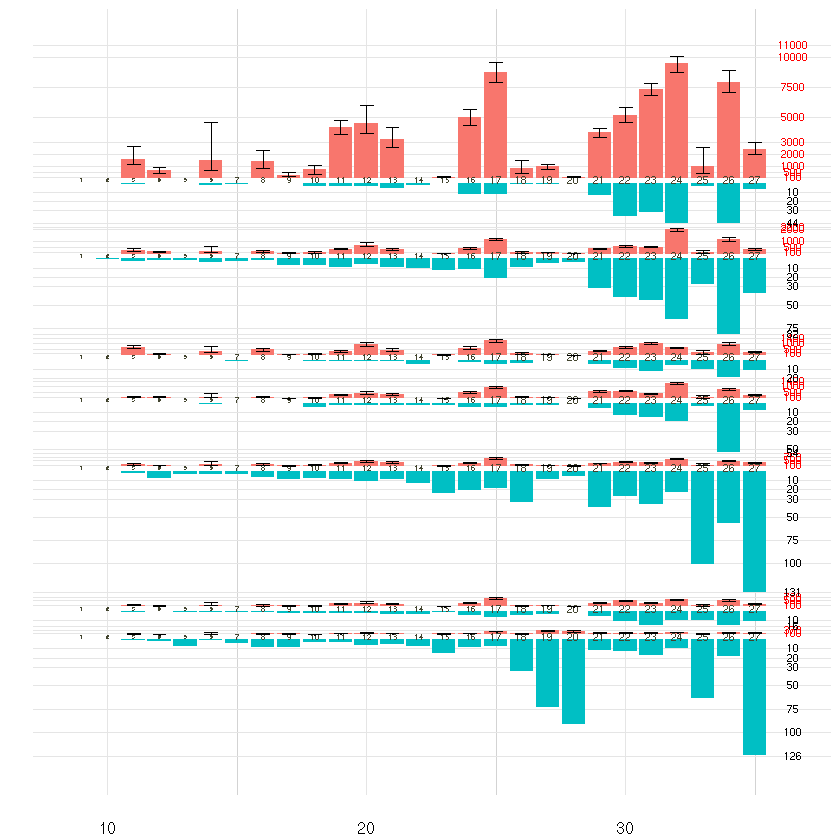

In [283]:

p <- p + theme(legend.position = "none")

p


In [302]:
alphaStart <- 2*pi*((max(DPLOT_err$ymax[DPLOT_err$reg==regs[1]]+d_reg/2 + esp_dis_nb,na.rm=TRUE))/totalLength)

In [303]:
alphaStart

[1] 1.148084

In [301]:
d_reg

[1] 400

In [292]:
max(DPLOT_err$ymax[DPLOT_err$reg==regs[1]]+d_reg/2,na.rm=TRUE)

[1] 10459.02

In [304]:
ggsave(filename = "../Figures/polar_props_RCT_DALYs.pdf",
      plot = p + coord_polar(theta="y",start=alphaStart,direction=-1),
      width=12,height=12)


Warning message:
“Removed 35 rows containing missing values (geom_rect).”Warning message:
“Removed 35 rows containing missing values (geom_errorbar).”

In [ ]:

#Tick marks
####################
#Pour RCTs
rcttks <- c(0,100,500,1000,2000,3000,5000,7500,10000)

maj_rcts <- function(nb){
x <- nb
k <- 0
while(x>=100){
x <- x%/%10
k <- k+1
}
res <- (x+1)*10^k
res
}

#Faire que les ticks aillent jusqu'au max des RCTs arrondi au sup
RCTtcks <- do.call('rbind',lapply(regs,function(x){
data.frame(breaks=
unique(DPLOT$ymin[DPLOT$metr=="RCT" & DPLOT$reg==x]) +
c(rcttks[2:findInterval(max(D$RCTs_sim95[D$Region==x]),rcttks)],maj_rcts(max(D$RCTs_sim95[D$Region==x]))),
labels=c(rcttks[2:findInterval(max(D$RCTs_sim95[D$Region==x]),rcttks)],maj_rcts(max(D$RCTs_sim95[D$Region==x]))))
}))
RCTtcks$col <- "1RCT"
#Adding 11200 and suppressing 12000
RCTtcks[RCTtcks$labels==12000,c(1,2)] <- RCTtcks[RCTtcks$labels==12000,c(1,2)] - 800
RCTtcks$labels <- as.character(RCTtcks$label)

#Pour GBD
#gbdtks <- c(0,1e7,2e7,3e7,5e7,7.5e7,1e8,1.5e8,2e8)
gbdtks <- c(0,1e7,2e7,3e7,5e7,7.5e7,1e8,1.5e8,2e8)/1e6

maj_gbd <- function(nb){
x <- nb
if(trunc(x)==x) return(x)
else return(trunc(x) + 1)
#k <- 0
#while(x>=100){
#x <- x%/%10
#k <- k+1
#}
#res <- (x+1)*10^k
#res
}

GBDtcks <- do.call('rbind',lapply(regs,function(x){
data.frame(breaks=
unique(DPLOT$ymin[DPLOT$metr=="GBD" & DPLOT$reg==x]) -
c(gbdtks[2:findInterval(max(D$GBD[D$Region==x]),gbdtks)],maj_gbd(max(D$GBD[D$Region==x])))*max(D$RCTs_sim)/max(D$GBD),
labels=c(gbdtks[2:findInterval(max(D$GBD[D$Region==x]),gbdtks)],maj_gbd(max(D$GBD[D$Region==x]))))
}))
GBDtcks$col <- "GBD"
#Changing 1.3e8 par 1.25e8 pour SSA
#GBDtcks[GBDtcks$labels==1.3e8,1] <- GBDtcks[GBDtcks$labels==1.3e8,1] + (0.05e8)*max(D$RCT)/max(D$GBD)
#GBDtcks[GBDtcks$labels==1.3e8,2] <- GBDtcks[GBDtcks$labels==1.3e8,2] - (0.05e8)

#Changing 1.4e8 par 1.3e8 pour SA
#GBDtcks[GBDtcks$labels==1.4e8,1] <- GBDtcks[GBDtcks$labels==1.4e8,1] + (0.1e8)*max(D$RCT)/max(D$GBD)
#GBDtcks[GBDtcks$labels==1.4e8,2] <- GBDtcks[GBDtcks$labels==1.4e8,2] - (0.1e8)
GBDtcks$labels <- as.character(GBDtcks$label)
#GBDtcks$labels <- gsub("0","",GBDtcks$label)

tcks <- rbind(RCTtcks,GBDtcks)
tcks$col <- as.factor(tcks$col)

#We suppress diseases for which Nb RCT simulation was not OK
DPLOT[DPLOT$dis%in%c("Sexually transmitted diseases excluding HIV","Leprosy","Hemoglobinopathies and hemolytic anemias","Congenital anomalies","Sudden infant death syndrome") & DPLOT$metr=="RCT",c(2:6)] <- NA

    
#GGPLOT OBJECT
####################
p <- ggplot(DPLOT) + geom_rect(aes(xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,fill=metr,label=dis)) +
 geom_text(aes(x=xcent,
        y=ycent,
        label=dis_nb,
        hjust=0.5),
size=DPLOT$size_dis_lab,col="#42442E")

    p <- p + geom_segment(aes(x=(xmin+xmax)/2,xend=(xmin+xmax)/2,y=ymax,yend=ymax_95),data=DPLOT[DPLOT$metr=="RCT",])
    p <- p + geom_segment(aes(x=xmin+wdt/2,xend=xmax-wdt/2,y=ymax_95,yend=ymax_95),data=DPLOT[DPLOT$metr=="RCT",])

p <- p + theme_minimal()
p <-p+theme(
    axis.title.y=element_blank(),
    axis.text.y=element_blank(),
    axis.ticks.y=element_blank(),
    axis.title.x=element_blank(),
    axis.ticks.x=element_blank()
    )

#Y axis
p <- p+ scale_y_continuous(minor_breaks = tcks$breaks, breaks=tcks$breaks,
#                     labels=tcks$labels,limits=c(min(DPLOT$ymax)-d_reg/2,max(DPLOT$ymax)+d_reg/2))
                      labels=rep("",nrow(tcks)),limits=c(min(DPLOT$ymax_95)-d_reg/2,max(DPLOT$ymax_95)+d_reg/2))
#p <- p + theme(axis.text.x = element_text(size=7,colour=tcks$col))
#p <- p + theme(panel.grid.minor=element_line(color="grey"))
#p <- p + theme(panel.grid.major=element_line(color="black"))
p <- p + theme(panel.grid.minor=element_line(color="#D3D3D3",size=0.1))    
    
p <- p+geom_text(
       aes(x=length(tt_gbd)+IC+1.5,
        y=breaks,
        label=labels,
	hjust=0.5),
    data=tcks,
    size=2,
    col=as.numeric(tcks$col))

#X axis
p <- p +  scale_x_continuous(breaks = NULL,limits = c(0,max(DPLOT$xmax)+3))

#Region labels
    p<-p+geom_text(
      aes(x=length(tt_gbd)+IC+3,
#       aes(x=Inf,
        y=xmin,
        label=label,
        angle=angle,
	hjust=0.5,vjust=0),
    data=familyLabelsDF,
    size=4.3)

#Taking_out legend
p <- p + theme(legend.position = "none")

#POLAR COORDINATES
p <- p + coord_polar(theta="y",start=alphaStart,direction=-1)

x11(width=12,height=12)

ggsave(filename = "Figures/polar_absolute_numbers_simulation_new.pdf")
dev.off()


#################################################################################################
####################################################################################################
#PROPORTIONS PLOT
########################

dpl <- D
#Pas besoin de normaliser RCTs et GBD

dpl$Pr_GBD <- 100*dpl$Prp_gbd
dpl$Pr_RCTs_sim <- 100*dpl$SimMed_PrRCTs
dpl$Pr_RCTs_sim95 <- 100*dpl$Sim95up_PrRCTs
    
#Taille barres = wdt*2
wdt <- 0.45
#Distance entre régions
d_reg <- 5
esp_dis_nb <- 1.2

#Rectangles pour une maladie et région donnée
displt <- 
function(dis,Rg,rg){
data.frame(dis=dis,	xmin = rep(which(dis==names(tt_gbd))-wdt,2),
			xmax = rep(which(dis==names(tt_gbd))+wdt,2),
			ymin = c(Rg+esp_dis_nb,Rg-esp_dis_nb),
			ymax = c(Rg+esp_dis_nb+dpl$Pr_RCTs_sim[dpl$Dis==dis & dpl$Region==rg],Rg-esp_dis_nb-dpl$Pr_GBD[dpl$Dis==dis & dpl$Region==rg]),
            ymax_95 = c(Rg+esp_dis_nb+dpl$Pr_RCTs_sim95[dpl$Dis==dis & dpl$Region==rg],Rg-esp_dis_nb-dpl$gpl[dpl$Dis==dis & dpl$Region==rg]),
			metr = c("RCT","GBD"),
			reg = rg, ycent = Rg, dis_nb = which(dis==names(tt_gbd)))
}

#Rectangles pour toutes les maladies, une région donnée
regplt <- function(Rg,rg) do.call('rbind',lapply(names(tt_gbd),function(x){displt(x,Rg,rg)}))

#Emplacement des régions
RG <- 0
for(i in 2:length(regs)){
RG <- c(RG,RG[i-1]-(2*esp_dis_nb+max(dpl$Pr_GBD[dpl$Region==regs[i-1]])+d_reg+max(dpl$Pr_RCTs_sim95[dpl$Region==regs[i]])))
}

#DataFrame Plot
DPLOT <- do.call('rbind',lapply(1:length(regs),function(i){regplt(RG[i],regs[i])}))

#Inner circle
IC <- 8
DPLOT$xmin <- DPLOT$xmin + IC
DPLOT$xmax <- DPLOT$xmax + IC
DPLOT$xcent <- DPLOT$dis_nb + IC

#REGION LABELS
#################
totalLength <- max(DPLOT$ymax)-min(DPLOT$ymax)+d_reg
alphaStart <- 2*pi*(max(dpl$Pr_RCTs_sim95[dpl$Region==names(tt_rcts)[1]]+d_reg/2)/totalLength)

  readableAngle<-function(x){
    angle<-x*(360/totalLength)
#    angle+ifelse(sign(cos(angle*pi/180))+sign(sin(angle*pi/180))==-2,180,0)
  }
    familyLabelsDF<-data.frame(xmin=RG,label=reg_labs)
    familyLabelsDF$angle <- readableAngle(familyLabelsDF$xmin)

#Disease labels
###################
DPLOT$size_dis_lab = 2.3*(40+DPLOT$dis_nb)/(40+max(DPLOT$dis_nb))

#Tick marks
####################
#Pour RCTs
rcttks <- c(0,1,5,10,15,20,25,30)
    
#Faire que les ticks aillent jusqu'au max des RCTs arrondi au sup
RCTtcks <- do.call('rbind',lapply(regs,function(x){
data.frame(breaks=
unique(DPLOT$ymin[DPLOT$metr=="RCT" & DPLOT$reg==x]) +
rcttks[1+1:findInterval(max(dpl$Pr_RCTs_sim95[dpl$Region==x]),rcttks)],
labels=rcttks[1+1:findInterval(max(dpl$Pr_RCTs_sim95[dpl$Region==x]),rcttks)],reg=x)
}))
RCTtcks$col <- "1RCT"
#RCTtcks <- RCTtcks[!(RCTtcks$reg=="Sub.Saharian.Africa" & RCTtcks$label==20),]
#RCTtcks <- RCTtcks[!(RCTtcks$reg=="Latin.America.and.Caribbean" & RCTtcks$label==20),]
#RCTtcks <- RCTtcks[!(RCTtcks$reg=="Central.Europe..Eastern.Europe..and.Central.Asia" & RCTtcks$label==25),]
#RCTtcks <- RCTtcks[!(RCTtcks$reg=="High.income" & RCTtcks$label==20),]
RCTtcks$labels <- as.character(RCTtcks$label)

#Pour GBD
gbdtks <- c(0,1,5,10,15,20,25,30,35)
GBDtcks <- do.call('rbind',lapply(regs,function(x){
data.frame(breaks=
unique(DPLOT$ymin[DPLOT$metr=="GBD" & DPLOT$reg==x]) -
gbdtks[1+1:findInterval(max(dpl$Pr_GBD[dpl$Region==x]),gbdtks)],
labels=gbdtks[1+1:findInterval(max(dpl$Pr_GBD[dpl$Region==x]),gbdtks)],reg=x)
}))
GBDtcks$col <- "GBD"
#GBDtcks[GBDtcks$reg=="Southeast.Asia..East.Asia.and.Oceania" & GBDtcks$label==20,c(1,2)] <- GBDtcks[GBDtcks$reg=="Southeast.Asia..East.Asia.and.Oceania" & GBDtcks$label==20,c(1,2)] - c(-2,2)
#GBDtcks[GBDtcks$reg=="South.Asia" & GBDtcks$label==25,c(1,2)] <- GBDtcks[GBDtcks$reg=="South.Asia" & GBDtcks$label==25,c(1,2)] - c(-3,3)
#GBDtcks[GBDtcks$reg=="Latin.America.and.Caribbean" & GBDtcks$label==15,c(1,2)] <- GBDtcks[GBDtcks$reg=="Latin.America.and.Caribbean" & GBDtcks$label==15,c(1,2)] - c(-2,2)
#GBDtcks[GBDtcks$reg=="Sub.Saharian.Africa" & GBDtcks$label==25,c(1,2)] <- GBDtcks[GBDtcks$reg=="Sub.Saharian.Africa" & GBDtcks$label==25,c(1,2)] - c(-2,2)
GBDtcks$labels <- as.character(GBDtcks$label)

tcks <- rbind(RCTtcks,GBDtcks)
tcks$col <- as.factor(tcks$col)

#We suppress diseases for which Nb RCT simulation was not OK
DPLOT[DPLOT$dis%in%c("Sexually transmitted diseases excluding HIV","Leprosy","Hemoglobinopathies and hemolytic anemias","Congenital anomalies","Sudden infant death syndrome") & DPLOT$metr=="RCT",c(2:6)] <- NA

#Gaps
DGaps <- DPLOT[paste(DPLOT$reg,DPLOT$dis)%in%paste(dpl$Region[dpl$GAP & dpl$Pr_GBD>=1],dpl$Disease[dpl$GAP &  dpl$Pr_GBD>=1]),]
DGaps <- DGaps[!DGaps$dis%in%c("Sexually transmitted diseases excluding HIV","Leprosy","Hemoglobinopathies and hemolytic anemias","Congenital anomalies","Sudden infant death syndrome"),]
DGaps$gap_shape <- paste(DGaps$reg,DGaps$dis)%in%paste(dpl$Region[dpl$GAP & dpl$Pr_GBD>=5],dpl$Disease[dpl$GAP &  dpl$Pr_GBD>=5])
DGaps <- DGaps[DGaps$metr=="GBD",]
DGaps$gap_shape <- factor(DGaps$gap_shape)
    
#GGPLOT OBJECT
####################
DPLOT$shape <- DPLOT$dis_nb
DPLOT$shape[DPLOT$shape==27] <- 0
DPLOT$shape[DPLOT$shape==26] <- 32
DPLOT$shape <- as.factor(DPLOT$shape)

p <- ggplot(DPLOT) + geom_rect(aes(xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,fill=metr,label=dis)) +
 geom_text(aes(x=xcent,
        y=ycent,
        label=dis_nb,
	hjust=0.5),
size=DPLOT$size_dis_lab,col="#42442E") 

    p <- p + geom_segment(aes(x=(xmin+xmax)/2,xend=(xmin+xmax)/2,y=ymax,yend=ymax_95),data=DPLOT[DPLOT$metr=="RCT",])
    p <- p + geom_segment(aes(x=xmin+wdt/2,xend=xmax-wdt/2,y=ymax_95,yend=ymax_95),data=DPLOT[DPLOT$metr=="RCT",])

    p <- p + geom_point(data=DGaps,aes(x=(xmin+xmax)/2,y=ymax - 2,shape=gap_shape))
    
p <- p + theme_minimal()
p <-p+theme(
    axis.title.y=element_blank(),
    axis.text.y=element_blank(),
    axis.ticks.y=element_blank(),
    axis.title.x=element_blank(),
    axis.ticks.x=element_blank()
    )

#Y axis
p <- p+ scale_y_continuous(minor_breaks = tcks$breaks, breaks=tcks$breaks,
#                     labels=tcks$labels,limits=c(min(DPLOT$ymax)-d_reg/2,max(DPLOT$ymax)+d_reg/2))
                      labels=rep("",nrow(tcks)),limits=c(min(DPLOT$ymax)-d_reg/2,max(DPLOT$ymax)+d_reg/2))
#p <- p + theme(axis.text.x = element_text(size=7,colour=tcks$col))
p <- p + theme(panel.grid.minor=element_line(color="#D3D3D3",size=0.1))    

p <- p+geom_text(
       aes(x=length(tt_gbd)+IC+1.5,
        y=breaks,
        label=labels,
	hjust=0.5),
    data=tcks,
    size=2,
    col=as.numeric(tcks$col))

#X axis
p <- p +  scale_x_continuous(breaks = NULL,limits = c(0,max(DPLOT$xmax)+3))

#Region labels
    p<-p+geom_text(
      aes(x=length(tt_gbd)+IC+3,
#       aes(x=Inf,
        y=xmin,
        label=label,
        angle=angle,
	hjust=0.5,vjust=0),
    data=familyLabelsDF,
    size=4.5)


#POLAR COORDINATES
p <- p + coord_polar(theta="y",start=alphaStart,direction=-1)

p <- p + theme(legend.position = "none")

x11(width=12,height=12)

ggsave(filename = "Figures/polar_proportion_simulation_new.pdf")

dev.off()